<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* **Part 6.1: Using Convolutional Neural Networks**
* Part 6.2: Using Pretrained Neural Networks with Keras
* Part 6.3: Looking at Keras Generators and Image Augmentation


### **How to Change Runtime Type**

You are advised to change your runtime type **BEFORE**  you begin working on this lesson. That's because when you change your runtime type, all your previous work is erased!

To change your runtime type, select **Runtime** on the main toolbar and then select **Change runtime type**

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_COLAB1.png)


The different GPU and TPU selections change from time to time as new accelerators are developed. More importantly, the available choices will depend on whether you have a paid membership subscription (see below) or a free account.

**-----WARNING-WARNING-WARNING-WARNING-WARNING--------**

If you decide NOT to purchase a paid membership, it will take more the **3 hours** to complete this lesson! Just training the neural network in Example-Step 9 will require about 2 1/2 hours.

If you are using Colab for free, you need to select TPU v2.8:

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image66.png)

The free T4 GPU doesn't include enough RAM to run this lesson. However, training times will be EXTREMELY long (over 2 hours) with the free `TPU v2.8` accelerator.

Once you have pressed the `Save` button, you can continue with this lesson.

#### **Buying a Colab Membership**

A paid membership is only $9.99 a month, and you can cancel at anytime. If you want to purchase a paid membership, check out: [Google Colab Paid Services](https://colab.research.google.com/signup).

If you have a paid membership, you should choose the `L4 GPU` or the `A100` with the `High-Ram` option selected. Instead of waiting hours for this lesson to run, training times will usually be less than 10 minutes.











### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


## **Define functions**

The cell below creates several functions that are needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [2]:
# Create functions for this lesson

import psutil
import os

def check_current_ram():
  ram = psutil.virtual_memory()
  print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

def list_files():
   files = os.listdir('.')
   print(f"Current files: {files}")

def list_extract():
  files = os.listdir(EXTRACT_TARGET)
  print(f"Current files in EXTRACT_TARGET: {files}")

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### Record your specific GPU/TPU accelerator

To faciliate grading of your homework, it is important that you specify which hardware accelerator you are using. Unfornuately, this has to be done manually since there is no other way to get this information.

In the cell below there is a Python dictionary called `my_GPU_dict`. Below the dictionary is the code fragment:

~~~text
# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[ ]
~~~

Before you can continue, you must place a number within the square brackets corresponding to your selected GPU or TPU. For example, if you are using the recommended `A100 GPU` you would enter the number `2` in the square brackets and then run the cell.

In [3]:
# Record your current Runtime GPU/TPU


# List of Current GPU/TPUs
my_GPU_dict = {
    1: 'CPU',
    2: 'A100 GPU',
    3: 'L4 GPU',
    4: 'T4 GPU',
    5: 'TPU v2-8'
}

# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[5 ]

# Print selection
print(f"My current runtime GPU/TPU is: {my_GPU}")

My current runtime GPU/TPU is: TPU v2-8


If the code is correct, you should see something like the following:

~~~text
My current runtime GPU/TPU is: TPU v2-8
~~~

If you don't put a number inside the square brackets, you will receive an error message.

# **Part 6.1: Keras Neural Networks for Medical MNIST**

This module will focus on computer vision. There are some important differences and similarities with previous neural networks.

* We will usually use classification, though regression is still an option.
* The input to the neural network is now 3D (height, width, _and_ color)
* Data are not transformed; no more Z-scores or dummy variables.
* Processing time is **_much_**  longer.
* We now have different layer types. Besides dense layers, we now have _convolution layers_, and _max-pooling layers_.
* Data will no longer arrive as tabular data stored in CSV files, but as hundred or even thousands of **_images_**.


## Common Computer Vision Data Sets

There are many data sets for computer vision. Two of the most popular classic datasets are the MNIST digits data set and the CIFAR image data sets. We will be using two MNIST data sets in this lesson. It is important to be familiar with both sets, neural network texts often refer to them.

The [MNIST Digits Data Set](http://yann.lecun.com/exdb/mnist/) is very popular in the neural network research community. You can see a sample of it below.

**Figure 6.MNIST: MNIST Data Set**

![MNIST Data Set](https://biologicslab.co/BIO1173/images/class_8_mnist.png "MNIST Data Set")

The original MNIST Digit Data Set is a large database of handwritten digits that is commonly used for training various image processing systems. It was created by Yan LeCun, Corinna Cortes, and Christopher Burges as a benchmark for evaluating machine learning algorithms in the field of computer vision. The dataset was first released in 1998 and consists of 60,000 training images and 10,000 testing images of handwritten digits from 0 to 9.

The MNIST dataset has been widely used in the research community to develop and test classification algorithms, particularly in the field of deep learning. It has become a standard benchmark for evaluating the performance of machine learning models on image recognition tasks. Despite its simplicity, the MNIST dataset remains popular due to its ease of use and ability to quickly assess the effectiveness of new algorithms.

Over the years, the MNIST dataset has been used in numerous research studies and competitions, leading to the development of more advanced techniques in computer vision. It continues to be a valuable resource for researchers and practitioners in the field of machine learning.

[MedMINST Data Sets](https://medmnist.com/) are a collection of 18 standardized biomedical datasets produced by a consortium of researchers at Harvard University and colaborators in Germany and China. The image sets cover a variety medical tissues and cell types including Chest X-Rays, Colon Pathology, Breast Ultrasound, Blood Cytology and Abdominal CT scans. The `RetinaMINST` dataset has 1,600 fundus camera samples (1,080 training, 120 validation, 400 test).

**Figure 6.MedMNIST: RetinaMNIST Data Set**

![RetinaMNIST](https://biologicslab.co/BIO1173/images/class_06/RetinaMNIST.jpg "RetinaMNIST")

The [CIFAR-10 and CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) datasets are also frequently used by the neural network research community.


**Figure 6.CIFAR: CIFAR Data Set**

![CIFAR Data Set](https://biologicslab.co/BIO1173/images/class_8_cifar.png "CIFAR Data Set")

The CIFAR-10 data set contains low-rez images that are divided into 10 classes. The CIFAR-100 data set contains 100 classes in a hierarchy.

# **Convolutional Neural Networks (CNNs)**

The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). Fukushima  (1980) [[Cite:fukushima1980neocognitron]](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf) introduced the original concept of a convolutional neural network, and   LeCun, Bottou, Bengio & Haffner (1998) [[Cite:lecun1995convolutional]](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf) greatly improved this work.

From this research, Yan LeCun introduced the famous LeNet-5 neural network architecture. This chapter follows the **LeNet-5 style** of convolutional neural network. Although computer vision primarily uses CNNs, this technology has some applications outside of the field. You need to realize that if you want to utilize CNNs on non-visual data, you must find a way to encode your data to mimic the properties of visual data.  

The order of the input array elements is _crucial_ to the training. In contrast, most neural networks that are not CNNs, treat their input data as a long vector of values. The order in which you arrange the incoming features in this vector is irrelevant. Importantly, you can't change the order of the data in these vectors for these types of neural networks once your network has been trained.

On the other hand, the CNN network arranges the inputs into a **grid**. This arrangement works well with images because the pixels in closer proximity to each other are important to each other. The order of pixels in an image is significant. The human body is a relevant example of this type of order. For the design of the face, we are accustomed to eyes being near to each other.

This advance in CNNs is due to years of research on biological eyes. In other words, CNNs utilize overlapping fields of input to simulate features of biological eyes. Until this breakthrough, AI had been unable to reproduce the capabilities of biological vision.

Scale, rotation, and noise have presented challenges for AI computer vision research. You can observe the complexity of biological eyes in the example that follows.

A friend raises a sheet of paper with a large number written on it. As your friend moves nearer to you, the number is still identifiable. In the same way, you can still identify the number when your friend rotates the paper. Lastly, your friend creates noise by drawing lines on the page, but you can still identify the number.

As you can see, these examples demonstrate the high function of the biological eye and allow you to understand better the research breakthrough of CNNs. That is, this neural network can process scale, rotation, and noise in the field of computer vision. You can see this network structure in Figure 6.LENET.

**Figure 6.LENET: A LeNET-5 Network (LeCun, 1998)**

![A LeNET-5 Network](https://biologicslab.co/BIO1173/images/class_8_lenet5.png "A LeNET-5 Network")

So far, we have only seen one layer type (dense layers). By the end of this course you will also know about:
  
* **Convolution Layers** - Used to scan across images.
* **Max Pooling Layers** - Used to downsample images.
* **Dropout Layers** - Used to add regularization.
* **LSTM and Transformer Layers** - Used for time series data.


## **Convolution Layers**

The first layer that we will examine is the convolutional layer. We will begin by looking at the hyper-parameters that you must specify for a convolutional layer in most neural network frameworks that support the CNN:

* Number of filters
* Filter Size
* Stride
* Padding
* Activation Function/Non-Linearity

The primary purpose of a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters we give to a convolutional layer, the more features it can see.

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each image row. There is also a hyperparameter that specifies both the width and height of the square-shaped filter. The following figure shows this configuration in which you see the six convolutional filters sweeping over the image grid:

A convolutional layer has weights between it and the previous layer or image grid. Each pixel on each convolutional layer is a weight. Therefore, the number of weights between a convolutional layer and its predecessor layer or image field is the following:

```
[FilterSize] * [FilterSize] * [# of Filters]
```

For example, if the filter size were 5 (5x5) for 10 filters, there would be 250 weights.

You need to understand how the convolutional filters sweep across the previous layer's output or image grid. Figure 6.CNN illustrates the sweep:

**Figure 6.CNN: Convolutional Neural Network**
![Convolutional Neural Network](https://biologicslab.co/BIO1173/images/class_8_cnn_grid.png "Convolutional Neural Network")

The above figure shows a convolutional filter with 4 and a padding size of 1. The **padding size** is responsible for the border of zeros in the area that the filter sweeps. Even though the image is 8x7, the extra padding provides a virtual image size of 9x8 for the filter to sweep across. The **stride** specifies the number of positions the convolutional filters will stop. The convolutional filters move to the right, advancing by the number of cells specified in the stride. Once you reach the far right, the convolutional filter moves back to the far left; then, it moves down by the stride amount and continues to the right again.

Some constraints exist concerning the size of the stride. The stride cannot be `0`. The convolutional filter would never move if you set the stride to `0`. Furthermore, neither the stride nor the convolutional filter size can be larger than the previous grid. There are additional constraints on the stride (*s*), padding (*p*), and the filter width (*f*) for an image of width (*w*). Specifically, the convolutional filter must be able to start at the far left or top border, move a certain number of strides, and land on the far right or bottom border. The following equation shows the number of steps a convolutional operator
must take to cross the image:

$$ steps = \frac{w - f + 2p}{s}+1 $$

The number of steps must be an integer. In other words, it cannot have decimal places. The purpose of the padding (*p*) is to be adjusted to make this equation become an integer value.


### **Max Pooling Layers**

Max-pool layers downsample a 3D box to a new one with smaller dimensions. Typically, you can always place a max-pool layer immediately following the convolutional layer. The LENET shows the max-pool layer immediately after layers C1 and C3. These max-pool layers progressively decrease the size of the dimensions of the 3D boxes passing through them. This technique can avoid overfitting (Krizhevsky, Sutskever & Hinton, 2012).

A pooling layer has the following hyper-parameters:

* Spatial Extent (*f*)
* Stride (*s*)

Unlike convolutional layers, max-pool layers do not use padding. Additionally, max-pool layers have no weights, so training does not affect them. These layers downsample their 3D box input. The 3D box output by a max-pool layer will have a width equal to this equation:

$$ w_2 = \frac{w_1 - f}{s} + 1 $$

The height of the 3D box produced by the max-pool layer is calculated similarly with this equation:

$$ h_2 = \frac{h_1 - f}{s} + 1 $$

The depth of the 3D box produced by the max-pool layer is equal to the depth the 3D box received as input. The most common setting for the hyper-parameters of a max-pool layer is f=2 and s=2. The spatial extent (f) specifies that boxes of 2x2 will be scaled down to single pixels. Of these four pixels, the pixel with the maximum value will represent the 2x2 pixel in the new grid. Because squares of size 4 are replaced with size 1, 75% of the pixel information is lost. The following figure shows this transformation as a 6x6 grid becomes a 3x3:

**Figure 6.MAXPOOL: Max Pooling Layer**
![Max Pooling Layer](https://biologicslab.co/BIO1173/images/class_8_conv_maxpool.png "Max Pooling Layer")

Of course, the above diagram shows each pixel as a single number. A grayscale image would have this characteristic. We usually take the average of the three numbers for an RGB image to determine which pixel has the maximum value.

----------------------------------------
### **Supervised _vs_ Unsupervised Machine Learning**

In **_supervised_ machine learning**, the algorithm is trained on a **labeled** dataset, where each training example is paired with the correct output. The goal is to learn a mapping from input features to the corresponding output labels. During training, the algorithm adjusts its parameters to minimize the difference between the predicted output and the true label. Once the model is trained, it can make predictions on new, unseen data by applying the learned mapping. Common supervised learning tasks include classification and regression.

On the other hand, **_unsupervised_ machine learning** involves training the algorithm on an _unlabeled_ dataset, where the algorithm must find patterns or relationships in the data without explicit guidance. The goal of unsupervised learning is to discover hidden structures or clusters in the data. This type of learning is often used for tasks such as clustering, anomaly detection, and dimensionality reduction. Unlike supervised learning, there are no explicit output labels to guide the learning process in unsupervised learning.

---------------------------------------------

# **Example: Classification Convolutional Neural Networks**

We will now look at an example of a  classification meural network. For _supervised_ computer vision, your dataset will need some labels. For classification, this label usually specifies _what_ the image is a picture of, e.g., dog, cat, carcinoma, etc.

For a classification neural network, we will provide an image and expect the neural network to classify it as being one of several posibilites. In this example, we will use the `bloodmnist_224` dataset from MedMNIST that contains images of different types of blood cells.

The blood cell images and consists of 8 different classes. These classes include Neutrophils, Lymphocytes, Monocytes, Eosinophils, Basophils and Platelets.

Here are images showing the 8 types of blood cells in the `bloodmnist_224` dataset

![___](https://biologicslab.co/BIO1173/images/class_06/BloodCellTypes_A.png)

Each image is 244 X 244 pixels with 3 color channels (RGB).

Our goal will be to create a convolutional neural network (CNN) that can classify a blood cell image into one of these 8 blood cell types.


### Example Step - 1: Setup Evironmental Variables

**Environmental variables** are similar to hidden settings that tell your computer how to behave. They hold information that can affect how programs run on your system, such as paths to files, system directories, or user-specific settings. It's like setting the stage for your computer to know where to find all its props and scripts.

The code in the cell below creates environmental variables that are needed to download a specific datafile and then to extract this data into specific folders in your Colab notebook.

In [4]:
# Example Step - 1: Setup Environmental Variables

import os

# Define datafile location
URL = "https://biologicslab.co/BIO1173/data"
DOWNLOAD_SOURCE = URL+"/bloodmnist_224.npz"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print(f"DOWNLOAD_SOURCE {DOWNLOAD_SOURCE}")
print(f"DOWNLOAD_NAME {DOWNLOAD_NAME}")

# Define folder locations to store the data
PATH = "/content"
EXTRACT_TARGET = os.path.join(PATH,"/bloodmnist_224")
SOURCE = os.path.join(EXTRACT_TARGET)
TARGET = SOURCE

# Print out environmental variables
print(f"PATH {PATH}")
print(f"EXTRACT_TARGET {EXTRACT_TARGET}")
print(f"SOURCE {SOURCE}")
print(f"TARGET {TARGET}")

DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/bloodmnist_224.npz
DOWNLOAD_NAME bloodmnist_224.npz
PATH /content
EXTRACT_TARGET /bloodmnist_224
SOURCE /bloodmnist_224
TARGET /bloodmnist_224


If the code is correct, you should see the following output:

~~~text
DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/bloodmnist_224.npz
DOWNLOAD_NAME bloodmnist_224.npz
PATH /content
EXTRACT_TARGET /bloodmnist_224
SOURCE /bloodmnist_224
TARGET /bloodmnist_224
Current files: ['.config', 'drive', 'sample_data']
~~~

We are going to download a datafile called `bloodmnist_224.npz` from the course file server. We will then extract (unzip) its contents into a folder called `/bloodmnist_224`.

### Example Step - 2: Download and Extract Data

In Step 1 we defined the file we wanted to download and the folder in which to place the data after we unzipped it. In the next cell we perform both the download and the extraction.

#### **Download File**

The code in the cell below uses this code chunk to download the datafile.
~~~text
# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
~~~

The program `wget` is a non-interactive network downloader commonly used in Unix-like operating systems. It retrieves files from the web using HTTP, HTTPS, and FTP protocols.

#### **Extract File Contents**

The datafile is compressed (i.e. a `zip file`), so we need to extract the file contents. The next code chunk unzips it to folder specified by the environmental variables defined above:
~~~text
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
~~~
The command `unzip` is a command-line utility used to extract files from a ZIP archive.

At the end of the `unzip` command is `>/dev/null`. Normally, the `unzip` command prints out the name of every file that was extracted. Since there are 2,000 images, we don't want to see this print out. Instead the output is sent instead to `> dev/null` which hids the output. `dev/null` a special file that discards all data written to it—like a black hole for unnecessary or unwanted output. If you send a program’s output to /dev/null, it's basically saying, "I don't need this, just throw it away."

In [5]:
# Example Step - 2: Download and Extract Data

import os

print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

print("Downloading files...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)

# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
print("done.")

print("Extracting files...", end='')
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
print("done.")


Creating necessary directories...done.
Extracting files...done.


If the code is correct, you should see the following output:

~~~text
Creating necessary directories...done.
Downloading files...done.
Extracting files...done.
~~~

Image datafiles used by CNN neural networks need to be relatively large which means they take a fair amount of time to download, and then, they require a lot of memory and disk space to store and process. This is one of the main reasons for using Google Colab instead of trying to do this on your laptop.

### Example Step - 3: Load and Shuffle Images and Labels into Numpy arrays

Image data in dataset can be stored in different formats. In many cases, the image data is stored as individual pictures (frames) in a JPEG format or PNG format.

However, in this dataset, the images are stored in a collect of numpy arrays. The Numpy `.npy` format is a way to save Numpy arrays to disk in a binary file. This format stores the shape, data type, and data of the array efficiently, allowing for fast reading and writing making it perfect for handling large amounts of numerical data in a compact, easy-to-access way.

The code in the cell below reads the images and their corresponding labels using the Numpy command `np.load()` to create 6 numpy arrays containing the `training`, `test` and `validation` images and their labels.   

In addition to `unpacking` the images, the code also randomly shuffles the data using this code chunk:

~~~text
combined = list(zip(train_images, train_labels))
np.random.shuffle(combined)
train_X, train_Y = zip(*combined)
~~~

Is important to note that when shuffling the images (`train_images`) that their labels (`train_labels`) are shuffled at the same time to keep these arrays "synchronized" (i.e. the right label goes with the right image).

In [6]:
# Example Step - 3: Load and Shuffle Images and Labels into Numpy arrays

import numpy as np

# Set the random seed
#np.random.seed(42)

# Unpack and shuffle train_images
train_images = np.load(os.path.join(SOURCE,"train_images.npy"),)
train_labels = np.load(os.path.join(SOURCE,"train_labels.npy"),)
combined = list(zip(train_images, train_labels))
np.random.shuffle(combined)
train_X, train_Y = zip(*combined)
train_X = np.array(train_X)
train_Y = np.array(train_Y)
print(f"train_X: {train_X.shape}")
print(f"train_Y: {train_Y.shape}")

# Unpack and shuffle test_images
test_images = np.load(os.path.join(SOURCE,"test_images.npy"),)
test_labels = np.load(os.path.join(SOURCE,"test_labels.npy"),)
combined = list(zip(test_images, test_labels))
np.random.shuffle(combined)
test_X, test_Y = zip(*combined)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
print(f"test_X: {test_X.shape}")
print(f"test_Y: {test_Y.shape}")

# Unpack and shuffle val_images
val_images = np.load(os.path.join(SOURCE,"val_images.npy"),)
val_labels = np.load(os.path.join(SOURCE,"val_labels.npy"),)
combined = list(zip(val_images, val_labels))
np.random.shuffle(combined)
val_X, val_Y = zip(*combined)
val_X = np.array(val_X)
val_Y = np.array(val_Y)
print(f"val_X: {val_X.shape}")
print(f"val_Y: {val_Y.shape}")

train_X: (11959, 224, 224, 3)
train_Y: (11959, 1)
test_X: (3421, 224, 224, 3)
test_Y: (3421, 1)
val_X: (1712, 224, 224, 3)
val_Y: (1712, 1)


If the code is correct, you should see the following output:
~~~text
train_images: (11959, 224, 224, 3)
train_labels: (11959, 1)
test_images: (3421, 224, 224, 3)
test_labels: (3421, 1)
val_images: (1712, 224, 224, 3)
val_labels: (1712, 1)
~~~

**SPLIT DATA**

This MedMNSIT dataset has already been `split` into a training set (`train_images`, `train_labels`), a testing set (`test_images`, `test_labels`) and a validation set (`val_images`, `val_label`). However, in many other image datasets, you will be required to split the image data yourself.

**Image Size**

The image size is given by the array `shape`. For example, here is the output for the train images:

~~~text
train_images: (11959, 224, 224, 3)
~~~

What these `shape` numbers mean is that there is a total of `11959` images in the `train_images` array. Each image is `224` X `224` pixels in size and the last digit, `3`, indicates the images are color images. The 3 stands for 3 color channels: Red, Green and Blue (RGB). If an image only has a single color channel, the image is grayscaled.


### Example - Step 4 - Add Color Channel and Resize Images

In [7]:
# Example - Step 4:

import numpy as np
import tensorflow as tf

# Add a color channel if not already present
if train_X.ndim == 4:
    print("No need to add a color channel, images are RGB")
else:
    print("Adding monochrome color channel...", end='')
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)
    val_X = np.expand_dims(val_X, axis=-1)
    print("done")

# Resize images if they are less than 64 pixels
if train_X.shape[1] >= 64:
    print("No need to resize images--already 64x64 (or more) pixels")
    train_X_resized = train_X
    test_X_resized = test_X
    val_X_resized = val_X
else:
    print("Resizing images to 64x64 pixels...", end='')
    train_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in train_X])
    test_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in test_X])
    val_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in val_X])
    print("done")

# Copy back
train_X = np.copy(train_X_resized)
test_X = np.copy(test_X_resized)
val_X = np.copy(val_X_resized)


# Check shapes
print(train_X.shape)
print(test_X.shape)
print(val_X.shape)

No need to add a color channel, images are RGB
No need to resize images--already 64x64 (or more) pixels
(11959, 224, 224, 3)
(3421, 224, 224, 3)
(1712, 224, 224, 3)


If the code is correct, you should see the following output:

~~~text
No need to add a color channel, images are RGB
No need to resize images--already 64x64 (or more) pixels
(11959, 224, 224, 3)
(3421, 224, 224, 3)
(1712, 224, 224, 3)
~~~

### Example - Step 5: Check Available Memory

The code in the cell below shows how to check the used and the available memory in a Colab session. As will be explained below, knowing the amount of available memory can be useful during data processing. If you perform a function that increases the size of a dataset beyond what can be held in the available memory, your Colab session will _crash!_

In [8]:
# Example - Step 5: Check available memory

import psutil

# Get the memory details
mem = psutil.virtual_memory()

# Print total, available, and used memory
print(f"Total Memory: {mem.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {mem.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {mem.used / (1024 ** 3):.2f} GB")

Total Memory: 334.56 GB
Available Memory: 322.25 GB
Used Memory: 10.05 GB


If your accelerator is the TPU v2.8, you should see something similar to the following output:

~~~text
Total Memory: 334.56 GB
Available Memory: 322.25 GB
Used Memory: 10.05 GB
~~~

How much total memory you have depends upon what GPU or TPU runtime you are using. There is also a `High-RAM` option that can be activated in some paid runtime environments.

### Example - Step 6: Augment Train Image Set

Augmenting an image dataset by flipping images means creating new images by mirroring the original ones either horizontally or vertically.

**Why is it useful?**

1. **Increased Dataset Size:** Flipping images effectively multiplies your dataset without the need for additional data collection, which can be costly and time-consuming.

2. **Enhanced Robustness:** Models trained on augmented datasets learn to recognize objects from different perspectives, making them more robust and better at generalizing to real-world scenarios.

3. **Reduced Overfitting:** Augmentation helps reduce overfitting by introducing variability into the training data, ensuring the model doesn't just memorize the training images but learns to generalize from them.

It is always a good idea to augment a image dataset. However, there is one important caveat -- you need to have sufficient available memory to hold the augmented dataset.

The code in the cell below checks the available memory and compares it to the amount of memory that has already been used with this conditional statement:

~~~text
if mem.available <= mem.used:
~~~

If the available memory is less than or equal to the amount of memory that has already been used, no augmentation takes place. However, if there appears to be enough memory, the images in `train_X` are flipped vertically, and then horizontally and added back to `train_X`.

In [9]:
# Example - Step 6: Augment train image set

import numpy as np
import psutil

# Get the memory details
mem = psutil.virtual_memory()

# Don't augment if available memory isn't sufficient
if mem.available <= mem.used:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) might not be enough to augment train_X")
    print(f"Number of train_X images: {train_X.shape[0]}")
else:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) should be enough to augment train_X")
    print("Augmenting the number of images in train_X...", end=' ')

    # Initialize lists to store the augmented images and labels
    augmented_images = []
    augmented_labels = []

    # Iterate through each image and its corresponding label
    for img, label in zip(train_X, train_Y):
        # Original image
        augmented_images.append(img)
        augmented_labels.append(label)

        # Vertically flipped image
        augmented_images.append(np.flipud(img))
        augmented_labels.append(label)

        # Horizontally flipped image
        augmented_images.append(np.fliplr(img))
        augmented_labels.append(label)

    # Convert lists back to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    print("done")
    print(f"Original number of train_X images: {len(train_X)}")
    print(f"Augmented number of train_X images: {len(augmented_images)}")

    # Copy images back
    train_X = np.copy(augmented_images)
    train_Y = np.copy(augmented_labels)

Available memory (322.12 GB) should be enough to augment train_X
Augmenting the number of images in train_X... done
Original number of train_X images: 11959
Augmented number of train_X images: 35877


If the code is correct, you should see the following output:

~~~text
Available memory (73.90 GB) should be enough to augment train_X
Augmenting the number of images in train_X... done
Original number of train_X images: 11959
Augmented number of train_X images: 35877

~~~

In this situation, there was sufficient available memory to go ahead with augmentation. After flipping vertically and horizontally, there are now 3X more images in `train_X`.

### Example Step - 7: One-Hot Encode Labels

As you have learned previously, the Y-values for a classification neural network need to be **One-Hot Encoded** before they can be processed by the model. This is also true for image datasets and CNN neural networks. In this example, the Y-values are the labels that specify the blood cell type as an integer value from 0 through 7.

The code in the cell below uses the Keras function `to_categorical()` to One-Hot Encode the label information for the training, testing and validation images.

In [10]:
# Example Step - 7: One-Hot Encode Labels

from tensorflow.keras.utils import to_categorical
import numpy as np

# Determine the number of classes
classes, counts = np.unique(test_Y, return_counts=True)
class_count = len(classes)
print(f"The label data contains {class_count} classes")

train_Y = to_categorical(train_Y, num_classes=class_count)
test_Y = to_categorical(test_Y, num_classes=class_count)
val_Y = to_categorical(val_Y, num_classes=class_count)

print(f'Train Labels Shape (train_Y): {train_Y.shape}')
print(f'Test Labels Shape (test_Y): {test_Y.shape}')
print(f'Validation Labels Shape (val_Y): {val_Y.shape}')

The label data contains 8 classes
Train Labels Shape (train_Y): (35877, 8)
Test Labels Shape (test_Y): (3421, 8)
Validation Labels Shape (val_Y): (1712, 8)


If the code is correct, you should see the following output -
~~~text
The label data contains 8 classes
Train Labels Shape (train_Y): (11959, 8)
Test Labels Shape (test_Y): (3421, 8)
Validation Labels Shape (val_Y): (1712, 8))
~~~

As you can see, after One-Hot Encoding, there are now 8 classification types.

**WARNING:**

If your output shows 3 numbers instead of 2 - **Do not proceed!**
~~~text
The label data contains 8 classes
Train Labels Shape (train_Y): (11959, 8, 2)
Test Labels Shape (test_Y): (3421, 8, 2)
Validation Labels Shape (val_Y): (1712, 8, 2)
~~~

The presence of a third number (`2`) means that you have One-Hot encoded the data more than once. If you try to use this data, your model will crash during training. You need to go back to Step 1 and start over.

### Example Step - 8: Create and Compile CNN neural network model

The code in the cell below builds a classic **_Convolutional Neural Network (CNN) model_**.

#### **Setting the `input_dim`**
In a CNN model, input_dim refers to the dimensions of the input data that the model will process. It includes the height, width, and number of channels (color depth) of the images. For example, if you’re working with RGB images of size 64x64 pixels, the input_dim would be (64, 64, 3). This ensures that the model architecture matches the shape of your data. It’s the initial layer's responsibility to match this input shape, setting the stage for the entire convolutional process

#### **Setting the `learning_rate`**
Choosing the optimal learning rate for a CNN involves some experimentation and fine-tuning. You can start with a learning rate = 0.001. If training proceeds smoothly, that's great. However, if encounter a problem you could increase or decrease the learning rate to see if that resolves the issue.

#### **Create CNN model**

Here is a summary of the model:

1. **Conv2D Layer:** 64 filters, kernel size 3x3, using ReLU activation, input shape is 224x224x3.
2. **MaxPool2D Layer:** Reduces spatial dimensions by a factor of 2.
3. **Conv2D Layer:** 128 filters, kernel size 3x3, using ReLU activation.
4. **MaxPool2D Layer:** Another spatial dimension reduction.
5. **Dropout Layer:** Drops 50% of neurons to prevent overfitting.
6. **Flatten Layer:** Converts the 2D matrix data to a vector.
7. **Dense Layer:** Fully connected layer with 128 neurons, using ReLU activation.
8. **Dense Layer:** Output layer with 8 neurons, one for each category.

#### **Model Compiler**

Here is the code used to compile the model:

~~~text
# Compile model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
~~~

* **optimizer=keras.optimizers.Adam(learning_rate=learning_rate):** You're using the `Adam` optimizer to adjust the model's weights. `Adam` is known for being efficient and well-suited for large datasets or parameters. The variable `learning_rate` was set to `0.0001`.

* **loss=keras.losses.CategoricalCrossentropy():** CategoricalCrossentropy is a loss function used in classification tasks where the target labels are one-hot encoded (i.e., each label is represented as a binary vector). It measures the difference between the predicted probability distribution and the true distribution (the one-hot encoded labels). In simpler terms, it penalizes the model more when it assigns higher probabilities to incorrect classes and lower probabilities to the correct class. This helps guide the model to improve its predictions, making it more accurate over time. It's crucial for tasks like image classification, where you need the model to predict distinct classes with high confidence

* **metrics=['accuracy']:** Setting metrics=['accuracy'] means that during training, the model will track and display `accuracy` as an evaluation metric. Accuracy is the proportion of correct predictions among the total number of predictions made. It’s a straightforward way to gauge how well your model is performing. So, with metrics=['accuracy'], Keras will show you how often your model’s predictions match the true labels as it trains.

In [11]:
# Example Step - 8: Construct and compile CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np

# Define input_dim: Must be the pixel size of your images
input_dim = (224, 224, 3)

# Sete learning rate
learning_rate = 0.001

# Set Persistance
PATIENCE=10

# Create CNN model
model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 4th Convolution layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Create early stopping monitor
e_stop_monitor = EarlyStopping(monitor='val_loss',
                 min_delta=1e-3, patience=PATIENCE,
                 verbose=1, mode='auto',
                 restore_best_weights=True)

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                        

If the code is correct, you should see something similar to the following output:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image46.png)



### Example Step - 9: Train the Neural Network

Training (`model.fit()`) takes the greatest amount of time and computer power. The code in the cell below trains the neural network model on the training data (`train_X`, `train_Y`) and monitors its performance on the test data (`test_X`, `test_Y`).

The two most important variables that you can change is the maximum number of **_epochs_** to train the model and the **_batch size_**. The code in the cell below is set to train the neural network for a maximum of 100 epochs. This is an upper limit since the training includes an _early stopping monitor_ to stop training if overfitting is detected.

Here's the summary:

* **model.fit(train_X, train_Y, ...):** This is the method to train the model.
* **validation_data=(test_X, test_Y):** This is the data the model will use to validate its learning after each epoch (one complete pass through the training data).
* **epochs=EPOCHS:** This specifies the number of times the training process will iterate over the entire dataset.
* **batch_size=BATCH_SIZE:** This sets the number of samples that will be propagated through the network at once. Smaller batches mean more updates per epoch but higher computation cost. Your GPU or TPU can limit batch xize; larger batches require more memory. In practice, a batch size of 32, 64, of 128 are good places to start.
* **steps_per_epoch:** A good value for steps_per_epoch depends on the size of your training dataset and batch size. As a rule of thumb, it’s often set to the total number of training samples divided by the batch size:

$$ \text{steps_per_epoch} = \frac{\text{number of training samples}}{\text{batch size}} $$

* in the code below, the `steps_per_batch` is automatically computed with this code chunk:

~~~text
STEPS_PER_EPOCH = len(train_X) // BATCH_SIZE
~~~

* **callbacks=[e_stop_monitor]:** This uses a callback function to implement early stopping.

The code for the early stopping monitor was included in Example Step 8 above.

##### **IMPORTANT NOTICE: Training Time will depends on the CPU/GPU/TPU**

Colab always offers a basic CPU runtime. For many types of projects, including the types of neural networks that we have been looking at so far, there's very little to gain changing the runtime mode. In this lesson we are training a fairly large CNN on a fairly large image dataset. Using a GPU like the A100 can significantly shorten train times.

The types of GPUs and TPUs that are available in Colab vary over time. This is necessary for Colab to be able to provide access to these resources free of charge. Howver, even with a paid subscription, there are limits on how much time you can use any of the GPU/TPUs. So you shouldn't automatically change to runtime with a GPU or TPU unless there is a compelling reason to do so.

When running the next cell using one of Colab's least powerful GPU/TPU accelerator, the **A100 GPU**, running 100 epochs only required 4 minutes. Using Colab's standard CPU instead, the same neural network required more than **4 hours** to train!

In [12]:
# Example Step - 9: Train the Neural Network

import time
import tensorflow as tf
import numpy as np

# Set variables
EPOCHS = 100
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(train_X) // BATCH_SIZE

# Record start time
start_time = time.time()

# Print header
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}, runtime GPU/TPU: {my_GPU} --------------")

# Train the model
history = model.fit(train_X, train_Y,
                    validation_data=(val_X, val_Y),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[e_stop_monitor])


# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 560, runtime GPU/TPU: TPU v2-8 --------------
Epoch 1/100
560/560 [==============================] - 246s 435ms/step - loss: 1.1999 - accuracy: 0.8888 - val_loss: 1.4173 - val_accuracy: 0.6630
Epoch 2/100
560/560 [==============================] - 244s 436ms/step - loss: 0.4177 - accuracy: 0.9409 - val_loss: 0.9069 - val_accuracy: 0.7488
Epoch 3/100
560/560 [==============================] - 243s 433ms/step - loss: 0.3027 - accuracy: 0.9487 - val_loss: 30.4086 - val_accuracy: 0.0853
Epoch 4/100
560/560 [==============================] - 244s 435ms/step - loss: 0.2832 - accuracy: 0.9519 - val_loss: 0.4017 - val_accuracy: 0.9124
Epoch 5/100
560/560 [==============================] - 241s 431ms/step - loss: 0.2620 - accuracy: 0.9553 - val_loss: 0.3490 - val_accuracy: 0.9334
Epoch 6/100
560/560 [==============================] - 239s 427ms/step - loss: 0.2730 - accuracy: 0.9557 - val_loss: 2.1982 - val_accuracy: 0.

If you used the `TPU v2.8`, your output should be similar to the following:

First Epochs....
~~~text
----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 560, runtime GPU/TPU: TPU v2-8 --------------
Epoch 1/100
560/560 [==============================] - 246s 435ms/step - loss: 1.1999 - accuracy: 0.8888 - val_loss: 1.4173 - val_accuracy: 0.6630
Epoch 2/100
560/560 [==============================] - 244s 436ms/step - loss: 0.4177 - accuracy: 0.9409 - val_loss: 0.9069 - val_accuracy: 0.7488
Epoch 3/100
560/560 [==============================] - 243s 433ms/step - loss: 0.3027 - accuracy: 0.9487 - val_loss: 30.4086 - val_accuracy: 0.0853
~~~

Last Epoch...
~~~text
Epoch 14/100
560/560 [==============================] - 237s 424ms/step - loss: 0.2471 - accuracy: 0.9679 - val_loss: 90.3833 - val_accuracy: 0.0713
Epoch 15/100
560/560 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.9726Restoring model weights from the end of the best epoch: 5.
560/560 [==============================] - 240s 428ms/step - loss: 0.1884 - accuracy: 0.9726 - val_loss: 1.0460 - val_accuracy: 0.7617
Epoch 15: early stopping
Elapsed time: 0:59:55.71
~~~

With the `TPU v2.8, the total training time was about 1 hour with early stopping after the 5th Epoch in this particular run. In other runs, the free `TPU v2.8` runtime required more than 2 1/2 hours. If you had used the `A100` or the `L4` accelerators, the model would have trained in about 10 minutes.

The difference in training times between the A100 GPU and the TPU v2.8 in Google Colab can be attributed to several factors:

1. **Hardware Architecture:** The A100 GPU is designed specifically for deep learning and has a higher number of CUDA cores and Tensor Cores compared to the TPU v2.8. This allows the A100 to perform more computations per second, leading to faster training times.

2. **Memory Bandwidth:** The A100 has higher memory bandwidth with its HBM2e memory, which allows it to handle larger datasets and models more efficiently. The TPU v2.8, on the other hand, uses GDDR6 memory, which is slower in comparison.

3. **Optimization for Specific Tasks:** The A100 is optimized for a wide range of deep learning tasks, including training large models like GPT-3 and DALL-E. TPUs are also optimized for specific tasks, but the A100's architecture gives it an edge in general-purpose deep learning tasks

## **Evaluating Model's Training**

Now that we have trained our model, let's look at how it changed during its training.

### Example - Step 10: Plot `accuracy` and `val_accuracy`

The code in the cell below plot's the `accuracy` and the `val_accuracy` recorded during each epoch in the training cycle. As you can see, `accuracy` and the `val_accuracy` increase during training as model adjusts its synaptic weights to improve its classification precision after each epoch.

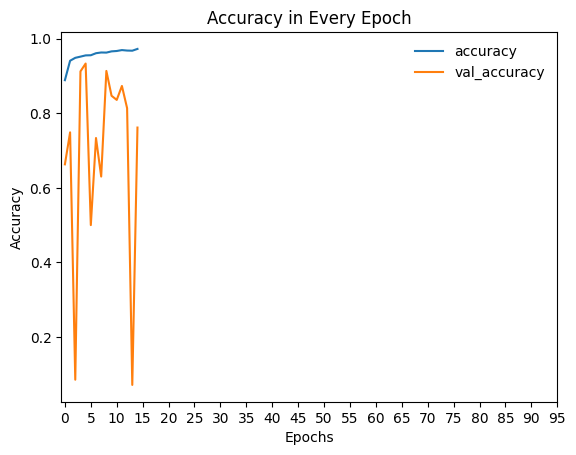

In [13]:
# Example - Step 10: Plot accuracy and val_accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], frameon=False)
plt.xticks(np.arange(0,100, 5))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy in Every Epoch')
plt.show()

If the code is correct, you should see something similar the following plot:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image59.png)

The number of Epochs run will depend upon how soon Early Stopping occured.

In training a neural network, `accuracy` and `val_accuracy` represent different performance metrics:

* **Accuracy:** This measures how well the model is performing on the training data. It calculates the percentage of correct predictions out of the total predictions made during training.

* **Val_accuracy:** This measures how well the model is performing on the validation data, which is separate from the training data. It calculates the percentage of correct predictions out of the total predictions made on the validation set. This metric helps you understand how well the model generalizes to new, unseen data.

In short, `accuracy` tells you how well the model is learning from the training data, while `val_accuracy` tells you how well the model is expected to perform on new data.


### Example - Step 11: Compute Accuracy Score with Validation Data

During training, we used the validation data (`val_X`, `val_Y`) to evaluate the model's performance. By doing so, it helps to tune hyperparameters and monitor the model to prevent overfitting.

To assess the ability of our trained model to classify images, we need to use an image set that the model has never been exposed to before. In the cell below,, we use the test data (`test_X`, `test_Y`) to compute an accuracy score. It is important to note that we are using a set of images that the model has **not** seen during training.

A situation called **data leakage** occurs when a CNN sees images during training and these same images are used later to compute the model's accuracy. When a CNN is trained and tested on overlapping data, the test set no longer provides a genuine assessment of the model's performance on unseen data. This artificially inflates accuracy, giving a misleading impression of how well the model would perform in real-world scenarios. To prevent this, always ensure your training and test sets are distinct and independent.



In [14]:
# Example - Step 11: Compute accuaracy score

from sklearn.metrics import accuracy_score

# Make predictions on the validation set
predictions = model.predict(test_X)

# Convert probabilities to class labels (if necessary)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_Y, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy on validation set: {accuracy:.2f}")


107/107 [==============================] - 5s 44ms/step
Accuracy on validation set: 0.93


If the code is correct, you should see something like the following output:
~~~text
107/107 [==============================] - 5s 44ms/step
Accuracy on validation set: 0.93
~~~

The accuracy of the model is extremely good! We could save the trained model and use it later to classify images obtained from new patients.

### Example - Step 12: Plot Image with Label

The code in the cell below reads the data for one image (image `10`) from the Numpy array `test_X` and its corresponding label from `test_Y`. The code then displays the data as an image with a title showing the blood cell type (`test_Y`).

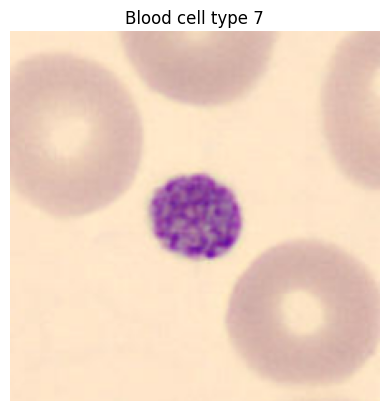

In [15]:
# Example - Step 12: Plot image with label
import matplotlib.pyplot as plt
import numpy as np

# Define test image number
img_num=10

# Read the image data
image = test_X[img_num]

# Display the image
plt.imshow(image)
plt.title('Blood cell type ' + str(np.argmax(test_Y[img_num])))
plt.axis('off')  # Hide the axis
plt.show()


If the code is correct, you should see an image of a blood cell. Because the data was shuffled, it is very unlikely that you will see this particular example.


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image60.png)


You can easily look at other images by simply changing the image number variable, `img_num`.

### Example - Step 13: Plot 4 Frames with Label

The code in the cell below generates a 2 X 2 plot showing 4 images from the training dataset along with their labels.

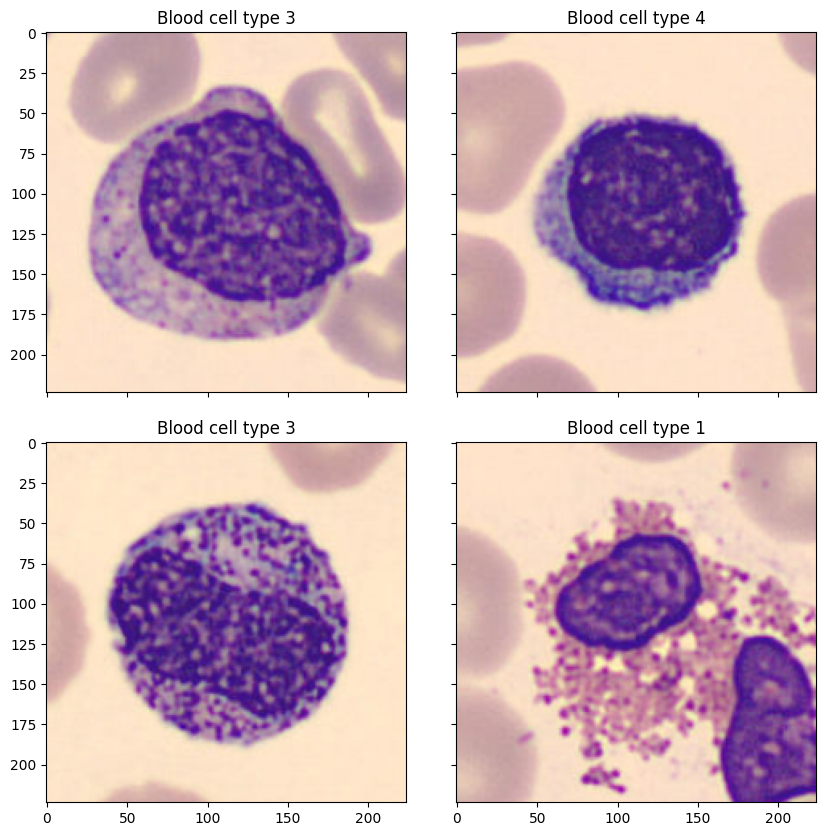

In [16]:
# Example - Step 13: Plot 4 frames with label

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    grid[x].set_title('Blood cell type ' + str(np.argmax(test_Y[x])))
    grid[x].imshow(test_X[x])


If the code is correct, you should see something similar to the following:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image19.png)

The figure shows 4 pictures from the `test_X` with their blood cell type shown in the image title. Since the images were randomly shuffled, you will not see the same 4 blood cells.

# **Exercise: Classification Convolutional Neural Networks**

For the **Exercises**, you are to build a CNN classification neural network that can classify 11 different classes of abdominal organs as seen from a saggital view.

The classes are:

* Liver
* Kidney
* Pancreas
* Spleen
* Gallbladder
* Stomach
* Intestine
* Bladder
* Colon
* Esophagus
* Uterus
* Prostate

![___](https://biologicslab.co/BIO1173/images/class_06/Organ_S_Types.png)
Each image is 28 X 28 pixels with no color channels.

Your goal will be to create a convolutional neural network (CNN) that can classify an abdominal image into one of these 11 organ types.


### **Exercise Step - 1: Setup Evironmental Variables**

In the cell below create the environmental variables needed to download the datafile called `organsmnist.npz` from the course file server and then extract (unzip) the data into a folder called `organsmnist` in your Colab notebook.

In [ ]:
# Insert your code for Exercise Step - 1 here



If your code is correct, you should see the following output:

~~~text
DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/organsmnist.npz
DOWNLOAD_NAME organsmnist.npz
PATH /content
EXTRACT_TARGET /organsmnist
SOURCE /organsmnist
TARGET /organsmnist
~~~
Check your output with the expected output above. If there are any differences, no matter how small, any code you write below will probably not run.

### **Exercise Step - 2: Download and Extract Data**

In the cell below, write the code to download and extract the datafile.

In [ ]:
# Insert your code for Exercise Step - 2 here



If your code is correct, you should see the following output:

~~~text
Creating necessary directories...done.
Downloading files...done.
Extracting files...done.
~~~

This MedMNIST datafile is much smaller than the one used in Example 1, so downloading and extracting will require significantly less time.

### **Exercise Step - 3: Load and Shuffle Images and Labels into Numpy arrays**

In the cell below use the Numpy command `np.load()` to create 6 numpy arrays containing the `training`, `test` and `validation` images and their labels. Shuffle the data as you "unpack" the data into the 6 arrays.  

In [ ]:
# Insert your code for Exercise Step - 3 here



If your code is correct, you should see the following output:
~~~text
train_X: (13932, 28, 28)
train_Y: (13932, 1)
test_X: (8827, 28, 28)
test_Y: (8827, 1)
val_X: (2452, 28, 28)
val_Y: (2452, 1)
~~~

### **Exercise - Step 4 - Add Color Channel and Resize Images**

In the cell below, write the code to add a color channel and to resize the images if needed. You can just reuse the code in Example - Step 4 above without modification.


In [ ]:
# Insert your code for Exercise - Step 4 here



If your code is correct, you should see the following output:

~~~text
Adding monochrome color channel...done
Resizing images to 64x64 pixels...done
(13932, 64, 64, 1)
(8827, 64, 64, 1)
(2452, 64, 64, 1)
~~~

Since this datafile did not have a color channel, the code in the cell above added one making the images "grayscale" instead of color.

Also, the images were rather small, only 28 X 28 pixels, when they were downloaded. The code in the cell above used the function

~~~text
 train_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in train_X])
~~~

to resize the images in the training, test and validation sets to 64 X 64 pixels.

### **Exercise - Step 5: Check Available Memory**

Write the code need to check the available system memory.

In [ ]:
# Insert your code for Example - Step 5 here



If your code is correct **_and_** you are using the A100 GPU, you should see the following output:
~~~text
Total Memory: 83.48 GB
Available Memory: 65.66 GB
Used Memory: 16.86 GB
~~~

If you are using a different GPU or TPU, you will see different values.

### **Exercise - Step 6: Augment Train Image Set**

In the cell below, write the code needed to augment the train image set (`train_X`) if there is sufficient memory available.

In [ ]:
# Insert your code for Example - Step 6 here



If your code is correct, you should see something similar to the following output:

~~~text
Available memory (65.66 GB) should be enough to augment train_X
Augmenting the number of images in train_X... done
Original number of train_X images: 13932
Augmented number of train_X images: 41796
~~~

If you are not using a A100 GPU, you might not have enough memory to augment the training data.

### **Exercise Step - 7: One-Hot Encode Labels**

In the cell below, use the Keras function `to_categorical()` to One-Hot Encode the label information for your training, testing and validation images.

In [ ]:
# Insert your code for Example Step - 7 here



If your code is correct, you should see the following output:

~~~text
The label data contains 11 classes
Train Labels Shape (train_Y): (41796, 11)
Test Labels Shape (test_Y): (8827, 11)
Validation Labels Shape (val_Y): (2452, 11)
~~~

### **WARNING:**

If there are 3 numbers for the `shape` values, it means you have One-Hot encoded the data twice. You need to go back to **Exercise - Step 1** and rerun all of your code cells.

### **Exercise Step - 8: Create and Compile CNN neural network model**

In the cell below, build a convolutional Neural Network (CNN) model to classify the 11 different abdominal organs as seen in a saggital view. Make sure to set the `input_dim` to `(64,64,1)`. Beside that change, you can reuse the code in Example Step - 8 above.


In [ ]:
# Insert your code for Exercise Step - 8 here



If your code is correct, you should see something similar to the following output:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image61.png)



### **Exercise Step - 9: Train the Neural Network**

In the cell below, train your neural network. Set the number of epochs to `100`, and the batch size to `64`.

In [ ]:
# Insert your code for Exercise Step - 9 here



If your runtime environment is `TPU v2.8`, your output should be similar to the following:

First Epoch...
~~~text
----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 653, runtime GPU/TPU: TPU v2.8 --------------
Epoch 1/100
653/653 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2741 - loss: 3.7108 - val_accuracy: 0.1521 - val_loss: 3.7459
~~~

Last Epoch...
~~~text
Epoch 70/100
653/653 [==============================] - 19s 30ms/step - loss: 0.6577 - accuracy: 0.7739 - val_loss: 0.5267 - val_accuracy: 0.8507
Epoch 71/100
652/653 [============================>.] - ETA: 0s - loss: 0.6414 - accuracy: 0.7797Restoring model weights from the end of the best epoch: 61.
653/653 [==============================] - 20s 30ms/step - loss: 0.6413 - accuracy: 0.7798 - val_loss: 0.5136 - val_accuracy: 0.8483
Epoch 71: early stopping
Elapsed time: 0:23:04.88
~~~

Training time was 2 minutes with the A100 GPU runtime. With the TPU v2.8 hardware accelerator, the training time was about 23 min.

## **Evaluating Model's Performance**

Now that you have trained your model, let's look at its performance.

### **Exercise - Step 10: Plot `accuracy` and `val_accuracy`**

In the cell below, write the code to plot the `accuracy` and  `val_accuracy` of your model for each Epoch in its training.  

In [ ]:
# Insert your code for Exercise - Step 19 here

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], frameon=False)
plt.xticks(np.arange(0,100, 5))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy in Every Epoch')
plt.show()


If your code is correct, you should see something similar to following plot:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image62.png)





### **Exercise - Step 11: Compute Accuracy Score with Validation Data**

In the cell below, write the code to assess your model's accuracy using test data (`test_X`, `test_Y`). Print out your accuracy measurement.


In [ ]:
# Insert your code for Exercise - Step 11 here



If your code is correct, you should see something similar to the following output:

~~~text
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy on validation set: 0.71
~~~

### **Exercise - Step 12: Plot Image with Label**

In the cell below, read the data for one image from the Numpy array `test_X` and its corresponding label from `test_Y` and then display the data as an image. Select the image number `10` and make sure to change the title to read "Organ type".

In [ ]:
# Insert your code for Exercise - Step 12 here




If your code is correct, you should see a saggital image of an abdominal organ. Since the image files were randomly shuffled, it is highly unlikely that your image is the same as the image below.


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image64.png)



### **Exercise - Step 13: Plot 4 Images with Labels**

In the cell, write the code to generate a 2 X 2 plot showing 4 images from your test dataset along with their labels. Change the titles to read `Organ type`.

In [ ]:
# Insert your code for Exercise - Step 13 here




If your code is correct, you should see 4 saggital images of an abdominal organ. Since the image files were randomly shuffled, it is highly unlikely that your image is the same as the image below.


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image65.png)



# Other Resources

* [Imagenet:Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/index)
* [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) - PhD student/instructor at Stanford.
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) - Stanford course on computer vision/CNN's.
* [CS231n - GitHub](http://cs231n.github.io/)
* [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/) - JavaScript library for deep learning.

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Class_06_1.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.